In [1]:
from ultralytics import YOLO
import cv2
import numpy as np

from collections import defaultdict

In [3]:
model = YOLO("yolov8n-pose.pt")
results = model("https://ultralytics.com/images/bus.jpg", save=True)

100%|██████████| 476k/476k [00:00<00:00, 37.8MB/s]
/home/jhj/venv/YOLOv8_venv/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 /home/jhj/dev_ws/09_YOLO/src/bus.jpg: 640x480 4 persons, 50.6ms
Speed: 1.8ms preprocess, 50.6ms inference, 681.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


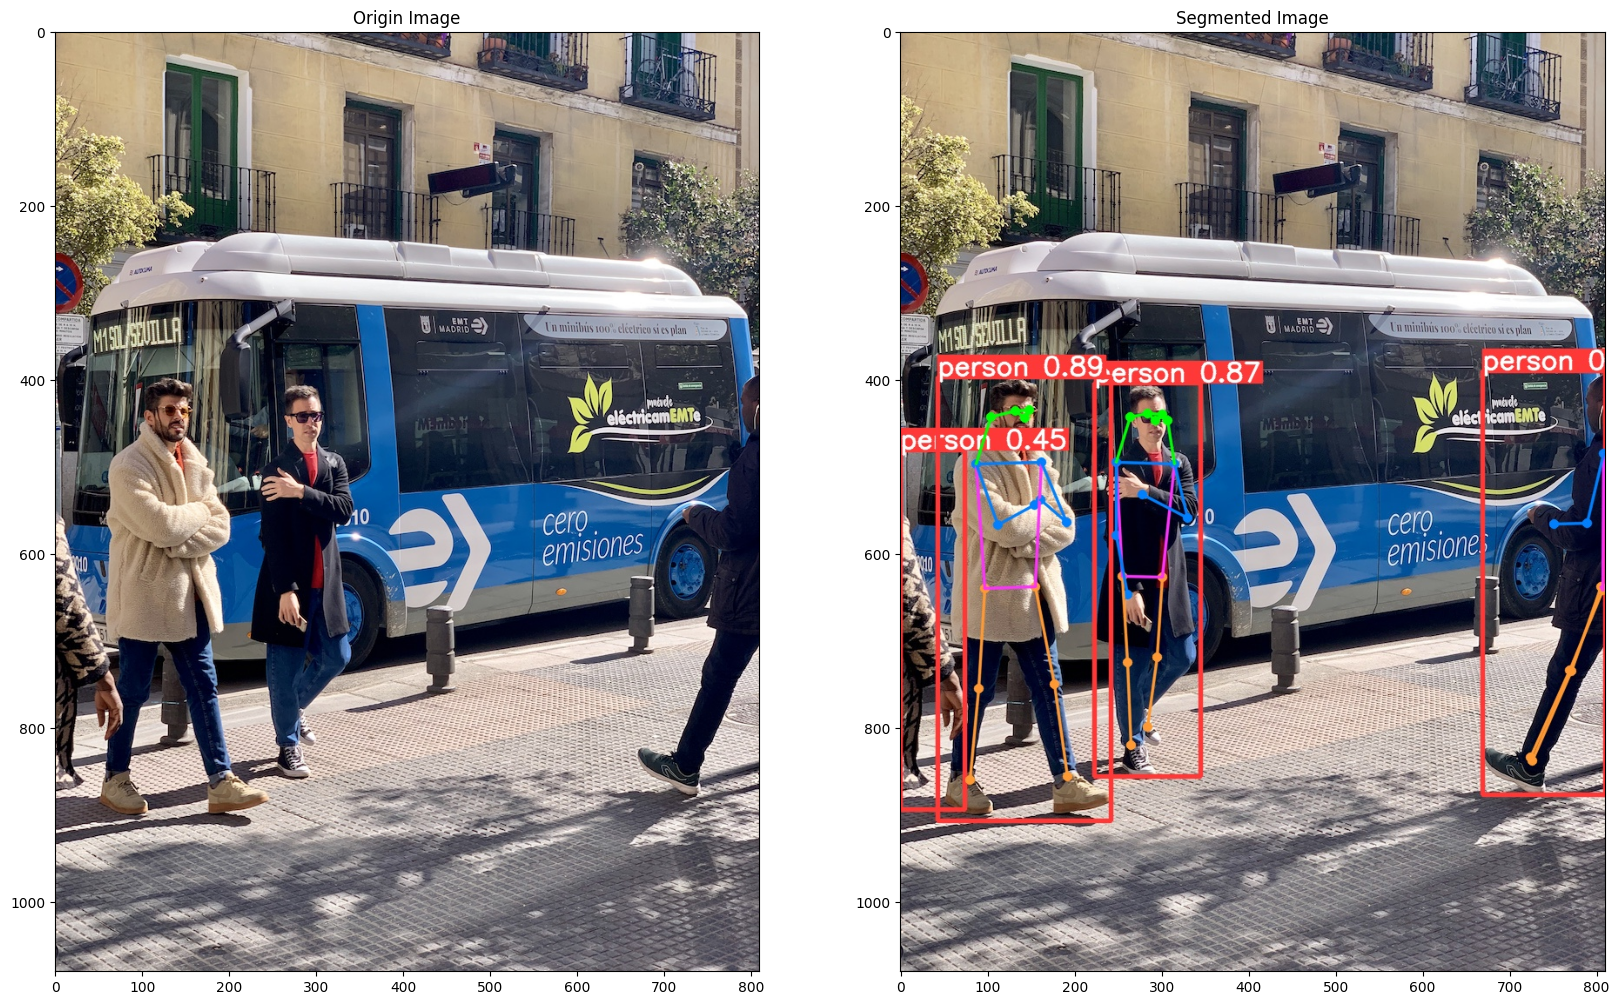

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
# Segmentation을 수행할 이미지
origin_img = Image.open('../data/bus.jpg')
# segmentation을 완료한 이미지
detect_img = Image.open('./runs/pose/predict/bus.jpg')
# matplotlib을 이용한 2개 이상 이미지 출력
fig, ax = plt.subplots(ncols=2, figsize=(20, 15))
ax[0].imshow(origin_img)
ax[0].set_title('Origin Image')
ax[1].imshow(detect_img)
ax[1].set_title('Segmented Image')
plt.show()

In [14]:
!pwd

/home/jhj/dev_ws/09_YOLO/src


In [2]:
model = YOLO("yolov8n-pose.pt")

results = model.train(data="coco8-pose.yaml", epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning /home/jhj/dev_ws/09_YOLO/data/coco8-pose/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning /home/jhj/dev_ws/09_YOLO/data/coco8-pose/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/pose/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/pose/train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.625G     0.9326      1.708     0.2572     0.5791      1.184         16        640: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          4         14      0.926      0.895      0.907      0.668      0.846        0.5      0.535      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.619G      1.151      3.616     0.3275     0.7841      1.251         19        640: 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]

                   all          4         14      0.928      0.924      0.907      0.668      0.844        0.5      0.535      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.619G      1.117      3.361     0.3933     0.9842      1.313         13        640: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

                   all          4         14      0.919      0.929      0.907      0.669      0.841        0.5      0.535      0.352



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.623G      1.487      5.214     0.4821       1.48       1.73         15        640: 100%|██████████| 1/1 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.50it/s]

                   all          4         14       0.91      0.929      0.953       0.68      0.796       0.56       0.54      0.341



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.623G      1.444      3.647     0.3512      1.142      1.466         14        640: 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.49it/s]

                   all          4         14      0.898      0.929      0.946      0.676       0.84        0.5      0.535      0.338



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.619G      1.132      3.654     0.3478     0.9743      1.326         17        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.36it/s]

                   all          4         14      0.905      0.929      0.912      0.683      0.846        0.5      0.522      0.327



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.648G      1.012      2.359     0.3315     0.9063      1.253         12        640: 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.22it/s]

                   all          4         14      0.897      0.929      0.917      0.703      0.642      0.643      0.591      0.324



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.638G       1.19      2.112      0.258     0.9138      1.261         12        640: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.68it/s]

                   all          4         14       0.86      0.929      0.917      0.702      0.972      0.571      0.627      0.309



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.644G     0.9235      2.987     0.4024     0.7872      1.143         16        640: 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.18it/s]

                   all          4         14      0.801      0.929      0.897      0.651      0.977      0.571       0.63      0.307



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.642G      1.087       3.02     0.2161     0.8209      1.215         16        640: 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.00it/s]

                   all          4         14          1      0.634      0.845       0.63      0.985      0.571      0.624       0.28



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.648G     0.8977      2.658     0.3535      0.724      1.124         13        640: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.93it/s]

                   all          4         14      0.889      0.643      0.756      0.579      0.889      0.643      0.637      0.275



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.638G     0.8505      2.179     0.3141     0.5897      1.144         19        640: 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.54it/s]

                   all          4         14      0.886      0.643      0.745      0.555      0.786      0.571      0.529      0.246



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.644G        1.2      2.292     0.3567     0.9102      1.662          7        640: 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.64it/s]

                   all          4         14      0.887      0.643      0.745      0.555      0.787      0.571      0.529      0.248



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.642G     0.9727      2.891     0.3016     0.8244      1.156         15        640: 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.60it/s]

                   all          4         14      0.882      0.643       0.75      0.522      0.784      0.571      0.542      0.225



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.648G     0.9188       2.07     0.3191     0.7062      1.211         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.09it/s]

                   all          4         14          1      0.628      0.749      0.508      0.887      0.563      0.568      0.226



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      0.64G      0.809      1.984     0.2382     0.7883      1.144         15        640: 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.09it/s]

                   all          4         14      0.971      0.643      0.751       0.51      0.754        0.5      0.485      0.244



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.648G      1.004      1.547      0.333     0.6985      1.182         15        640: 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.32it/s]

                   all          4         14      0.988      0.643      0.751       0.48      0.839        0.5      0.469      0.206



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.638G      1.143      3.819     0.3865       0.76      1.101         18        640: 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.98it/s]

                   all          4         14      0.988      0.643      0.751       0.48      0.839        0.5      0.469      0.206



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.648G     0.9272      2.334     0.2678     0.6849      1.054         27        640: 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.20it/s]

                   all          4         14          1      0.638      0.744      0.456      0.849        0.5      0.468      0.158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.642G       1.46      3.671     0.4132      0.925      1.423         17        640: 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.39it/s]

                   all          4         14          1      0.638      0.744      0.456      0.849        0.5      0.468      0.158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.652G      1.154      2.771     0.2791     0.9819      1.239         18        640: 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.90it/s]

                   all          4         14      0.897      0.626      0.732      0.447      0.796      0.558      0.528      0.152



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.635G      1.317      3.232     0.4048     0.6597      1.367         18        640: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.58it/s]

                   all          4         14      0.897      0.626      0.732      0.447      0.796      0.558      0.528      0.152



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.652G     0.8071       2.46     0.3049     0.6558      1.024         11        640: 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.84it/s]

                   all          4         14      0.884      0.571      0.705      0.408      0.662      0.429      0.398      0.151



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.642G     0.8928      2.181     0.2432     0.6167        1.2         14        640: 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.73it/s]

                   all          4         14      0.884      0.571      0.705      0.408      0.662      0.429      0.398      0.151



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.652G      0.673      2.283     0.2617     0.5224      0.994         11        640: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.29it/s]

                   all          4         14      0.984        0.5      0.659      0.382      0.961      0.429      0.505      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.642G     0.8577       1.97     0.2312     0.7076      1.105         15        640: 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.28it/s]

                   all          4         14      0.984        0.5      0.659      0.382      0.961      0.429      0.505      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.652G     0.9701      1.802      0.202      0.854      1.095         10        640: 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.18it/s]

                   all          4         14      0.823        0.5      0.617      0.331      0.968      0.429      0.474      0.143



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.642G     0.9183      2.591      0.353     0.6006       1.01         16        640: 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.19it/s]

                   all          4         14      0.823        0.5      0.617      0.331      0.968      0.429      0.474      0.143



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.654G     0.9367      3.094     0.3571     0.7892      1.004         20        640: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          4         14      0.963      0.429      0.608      0.328      0.634      0.286      0.299      0.121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.642G     0.9509       2.09     0.2776     0.6883      1.139         15        640: 100%|██████████| 1/1 [00:00<00:00, 14.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.86it/s]

                   all          4         14      0.963      0.429      0.608      0.328      0.634      0.286      0.299      0.121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.652G      1.126      2.734     0.2956     0.8975      1.234          8        640: 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.90it/s]

                   all          4         14          1      0.491      0.646      0.357      0.635      0.429       0.39      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.642G     0.6478      1.954     0.2707     0.5459     0.9926         11        640: 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.17it/s]

                   all          4         14          1      0.491      0.646      0.357      0.635      0.429       0.39      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.665G     0.9672      1.835      0.312     0.8436      1.208         12        640: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.16it/s]

                   all          4         14      0.887      0.564      0.665      0.369      0.799      0.357      0.355      0.096



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.646G     0.8417      2.544      0.296     0.6261      1.122         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.21it/s]

                   all          4         14      0.887      0.564      0.665      0.369      0.799      0.357      0.355      0.096



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.652G     0.8018      2.268     0.3677     0.5682     0.9738         15        640: 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.64it/s]

                   all          4         14      0.666      0.569      0.618      0.365      0.567      0.286      0.277      0.107



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.642G     0.9469      3.746     0.3372     0.8338      1.123         13        640: 100%|██████████| 1/1 [00:00<00:00, 14.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.88it/s]

                   all          4         14      0.666      0.569      0.618      0.365      0.567      0.286      0.277      0.107



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.654G     0.7929       3.02     0.3208     0.6291     0.9715         14        640: 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.77it/s]

                   all          4         14      0.977      0.429      0.592      0.338      0.487      0.214      0.167      0.069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.638G      0.941      2.641     0.3569     0.8089     0.9147         24        640: 100%|██████████| 1/1 [00:00<00:00, 14.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.18it/s]

                   all          4         14      0.977      0.429      0.592      0.338      0.487      0.214      0.167      0.069



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.665G     0.9907      3.007     0.3227     0.6862      1.039         15        640: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.15it/s]

                   all          4         14      0.672      0.429       0.52      0.256      0.333      0.214      0.181     0.0801



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.648G      1.187       2.79      0.244      1.069      1.194         12        640: 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.97it/s]

                   all          4         14      0.672      0.429       0.52      0.256      0.333      0.214      0.181     0.0801



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.652G      1.416      3.094     0.4176     0.8339      1.258         12        640: 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.61it/s]

                   all          4         14      0.624      0.429      0.488      0.217      0.309      0.214      0.154     0.0713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.638G      1.029      2.816     0.2966     0.7677      1.054         15        640: 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.48it/s]

                   all          4         14      0.624      0.429      0.488      0.217      0.309      0.214      0.154     0.0713



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.652G     0.8225      2.882     0.2705      0.595     0.9711         12        640: 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.72it/s]

                   all          4         14      0.718      0.429      0.495      0.198       0.47      0.286      0.233     0.0495



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.642G     0.7736      1.959        0.3     0.6349      1.034          9        640: 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 27.51it/s]

                   all          4         14      0.718      0.429      0.495      0.198       0.47      0.286      0.233     0.0495



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.648G      1.042      3.288     0.3618     0.8272      1.045         20        640: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.76it/s]

                   all          4         14      0.678      0.429      0.471      0.163      0.447      0.286      0.193     0.0517



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      0.64G     0.8203      1.831     0.3035     0.5692      1.045         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.69it/s]

                   all          4         14      0.678      0.429      0.471      0.163      0.447      0.286      0.193     0.0517



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.652G     0.7621      3.023     0.3449     0.5312      0.962         14        640: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.87it/s]

                   all          4         14      0.461        0.5      0.273      0.138      0.291      0.286      0.178     0.0319



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.642G     0.6771      2.129     0.3199     0.5807      0.979         15        640: 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.90it/s]

                   all          4         14      0.461        0.5      0.273      0.138      0.291      0.286      0.178     0.0319



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.648G     0.9132      3.141     0.3796      0.647      1.059         15        640: 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]

                   all          4         14      0.491        0.5       0.32      0.156      0.132      0.143     0.0356    0.00822



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.642G     0.6248      1.706     0.2379     0.5024     0.9345         13        640: 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]

                   all          4         14      0.491        0.5       0.32      0.156      0.132      0.143     0.0356    0.00822



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.667G     0.5817      2.012     0.2443     0.4382     0.9002         18        640: 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.32it/s]

                   all          4         14      0.368      0.357       0.32      0.174     0.0952     0.0714     0.0282    0.00845



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.648G     0.9426      1.917     0.3261     0.6216       1.06         17        640: 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.53it/s]

                   all          4         14      0.368      0.357       0.32      0.174     0.0952     0.0714     0.0282    0.00845



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.654G     0.6099      2.094     0.2401     0.5223     0.9698         11        640: 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.54it/s]

                   all          4         14      0.368      0.357       0.32      0.174     0.0952     0.0714     0.0282    0.00845



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.648G     0.7383      3.246     0.3543     0.5288      1.061         18        640: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.82it/s]

                   all          4         14      0.705      0.344      0.371       0.19      0.128     0.0714     0.0296    0.00761



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.642G      0.639      1.773     0.3023     0.5987      1.032         10        640: 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.55it/s]

                   all          4         14      0.705      0.344      0.371       0.19      0.128     0.0714     0.0296    0.00761



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.652G     0.6762      3.134       0.29     0.5594     0.9561         12        640: 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.07it/s]

                   all          4         14      0.705      0.344      0.371       0.19      0.128     0.0714     0.0296    0.00761



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.652G     0.5369      2.035     0.2867       0.43     0.8792         18        640: 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.91it/s]

                   all          4         14      0.824      0.357      0.399      0.185      0.149     0.0714     0.0315     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/100      0.64G      1.107      3.719     0.3401      1.113      1.418          9        640: 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all          4         14      0.824      0.357      0.399      0.185      0.149     0.0714     0.0315     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.648G     0.6506      2.328     0.2489     0.5596     0.9588         15        640: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.04it/s]

                   all          4         14      0.824      0.357      0.399      0.185      0.149     0.0714     0.0315     0.0101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.652G     0.8194      2.649     0.3327     0.5455      1.103         12        640: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.51it/s]

                   all          4         14      0.536      0.414      0.369      0.194      0.216      0.143      0.081     0.0146



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.642G      0.983      3.501     0.2905     0.9758      1.205         13        640: 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.93it/s]

                   all          4         14      0.536      0.414      0.369      0.194      0.216      0.143      0.081     0.0146



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.652G     0.7852      3.209     0.2248     0.6562      1.059         12        640: 100%|██████████| 1/1 [00:00<00:00, 14.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.62it/s]

                   all          4         14      0.536      0.414      0.369      0.194      0.216      0.143      0.081     0.0146



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.652G      0.524      2.094     0.2939     0.5157     0.9556         14        640: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.91it/s]

                   all          4         14      0.452      0.429      0.273      0.138      0.291      0.214      0.105     0.0209



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.638G     0.8062        2.6     0.3633      0.665     0.9631         19        640: 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.52it/s]

                   all          4         14      0.452      0.429      0.273      0.138      0.291      0.214      0.105     0.0209



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.652G     0.8175      2.113     0.3107     0.6186      1.006         16        640: 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.90it/s]

                   all          4         14      0.452      0.429      0.273      0.138      0.291      0.214      0.105     0.0209



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/100      0.65G     0.6859      3.622     0.3379     0.5244       1.06         10        640: 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.46it/s]

                   all          4         14      0.456      0.429      0.272      0.126      0.295      0.286      0.173     0.0407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.642G     0.6523      1.701     0.2883     0.5216     0.9385         16        640: 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.80it/s]

                   all          4         14      0.456      0.429      0.272      0.126      0.295      0.286      0.173     0.0407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/100      0.65G     0.8264      2.654     0.2917     0.6691     0.9925         24        640: 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.62it/s]

                   all          4         14      0.456      0.429      0.272      0.126      0.295      0.286      0.173     0.0407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.652G     0.9394      2.572     0.3125     0.6874      1.119         12        640: 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.11it/s]

                   all          4         14      0.489      0.429      0.273      0.125       0.35      0.286      0.173       0.05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.638G     0.7766      2.321     0.4244     0.8178      1.019          7        640: 100%|██████████| 1/1 [00:00<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.13it/s]

                   all          4         14      0.489      0.429      0.273      0.125       0.35      0.286      0.173       0.05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.652G      1.041      3.324      0.346     0.7579      1.054         17        640: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.33it/s]

                   all          4         14      0.489      0.429      0.273      0.125       0.35      0.286      0.173       0.05



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.648G     0.8801      3.809     0.3136     0.7338      1.079         18        640: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.23it/s]

                   all          4         14       0.43      0.429      0.293      0.132      0.271      0.214      0.141      0.039



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.642G     0.8335      1.864     0.2697     0.6473      1.113         13        640: 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.30it/s]

                   all          4         14       0.43      0.429      0.293      0.132      0.271      0.214      0.141      0.039



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/100      0.65G     0.7909      4.147     0.3444     0.8322      1.278          7        640: 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.60it/s]

                   all          4         14       0.43      0.429      0.293      0.132      0.271      0.214      0.141      0.039



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.648G     0.6091      2.275      0.311     0.4629     0.8517         22        640: 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.47it/s]

                   all          4         14      0.381      0.429      0.252      0.104      0.292      0.214      0.111     0.0343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/100      0.64G     0.7243      1.682     0.3813     0.5534      1.007          8        640: 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.93it/s]

                   all          4         14      0.381      0.429      0.252      0.104      0.292      0.214      0.111     0.0343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.654G     0.9087      2.661     0.3052     0.7552      1.162         18        640: 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.65it/s]

                   all          4         14      0.381      0.429      0.252      0.104      0.292      0.214      0.111     0.0343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.652G     0.5449      2.241     0.2751     0.5315     0.9222         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.25it/s]

                   all          4         14      0.523      0.429      0.319      0.149      0.391      0.214      0.157      0.053



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/100      0.64G     0.6404        1.4      0.348     0.4262      1.052         10        640: 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.18it/s]

                   all          4         14      0.523      0.429      0.319      0.149      0.391      0.214      0.157      0.053



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.652G     0.7956      2.512     0.3086     0.5814      1.095         16        640: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.20it/s]

                   all          4         14      0.523      0.429      0.319      0.149      0.391      0.214      0.157      0.053



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.652G     0.6371      2.423     0.2165     0.5863      1.118          9        640: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.30it/s]

                   all          4         14      0.402      0.286      0.325       0.15      0.238      0.143      0.121     0.0492



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.638G     0.6037      1.469     0.3125     0.5148     0.9158         20        640: 100%|██████████| 1/1 [00:00<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.07it/s]

                   all          4         14      0.402      0.286      0.325       0.15      0.238      0.143      0.121     0.0492



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.654G     0.8326      2.213     0.3376     0.5743      1.017         20        640: 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.55it/s]

                   all          4         14      0.402      0.286      0.325       0.15      0.238      0.143      0.121     0.0492



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.654G       1.18      3.905     0.2927      1.178      1.455         13        640: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.47it/s]

                   all          4         14      0.622      0.286      0.384      0.156      0.295      0.143      0.118     0.0328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.642G     0.7001      2.654     0.2739      0.657     0.9276         15        640: 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.90it/s]

                   all          4         14      0.622      0.286      0.384      0.156      0.295      0.143      0.118     0.0328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.654G     0.8663      1.916     0.2687     0.6933      1.199         14        640: 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.37it/s]

                   all          4         14      0.622      0.286      0.384      0.156      0.295      0.143      0.118     0.0328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.652G     0.6095      1.504     0.2454     0.4642     0.9762         14        640: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.73it/s]

                   all          4         14      0.622      0.286      0.384      0.156      0.295      0.143      0.118     0.0328



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.654G     0.8744      2.297     0.3108     0.6473      1.091         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.31it/s]

                   all          4         14      0.646      0.357      0.442      0.164      0.453      0.143     0.0875     0.0343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.642G     0.7427      2.668     0.2975     0.6434      1.037         15        640: 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.62it/s]

                   all          4         14      0.646      0.357      0.442      0.164      0.453      0.143     0.0875     0.0343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.667G     0.7253      1.411     0.3189     0.5618     0.9754         16        640: 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.20it/s]

                   all          4         14      0.646      0.357      0.442      0.164      0.453      0.143     0.0875     0.0343


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.663G     0.5077      1.421     0.2709     0.5173      0.876          7        640: 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.99it/s]

                   all          4         14      0.646      0.357      0.442      0.164      0.453      0.143     0.0875     0.0343



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.663G     0.4552      1.614     0.2692     0.4243     0.8672          7        640: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all          4         14      0.619      0.357      0.364      0.199      0.954      0.286      0.309     0.0822



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.646G     0.5699     0.9265     0.2233     0.4702     0.9484          7        640: 100%|██████████| 1/1 [00:00<00:00, 13.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.06it/s]

                   all          4         14      0.619      0.357      0.364      0.199      0.954      0.286      0.309     0.0822



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/100      0.65G     0.4437      1.099     0.2681     0.4223     0.8287          7        640: 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.61it/s]

                   all          4         14      0.619      0.357      0.364      0.199      0.954      0.286      0.309     0.0822



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/100      0.65G     0.4912      1.235     0.2684     0.5078     0.9754          7        640: 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.08it/s]

                   all          4         14      0.619      0.357      0.364      0.199      0.954      0.286      0.309     0.0822



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/100      0.65G      0.564      1.933     0.3754     0.4707     0.7759          7        640: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.94it/s]

                   all          4         14      0.649      0.429      0.467      0.222       0.97      0.286      0.304     0.0877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/100      0.64G     0.3957          1     0.2803     0.3843     0.8404          7        640: 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.37it/s]

                   all          4         14      0.649      0.429      0.467      0.222       0.97      0.286      0.304     0.0877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.652G     0.7855      2.186      0.291     0.5418      1.028          7        640: 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.71it/s]

                   all          4         14      0.649      0.429      0.467      0.222       0.97      0.286      0.304     0.0877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.652G     0.5537      1.057     0.2688     0.4975     0.9787          7        640: 100%|██████████| 1/1 [00:00<00:00, 14.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 25.96it/s]

                   all          4         14      0.649      0.429      0.467      0.222       0.97      0.286      0.304     0.0877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.652G     0.5282      1.016     0.2349     0.4789     0.8991          7        640: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.12it/s]

                   all          4         14      0.656      0.429      0.479      0.219      0.969      0.286      0.304      0.088



100 epochs completed in 0.012 hours.
Optimizer stripped from runs/pose/train10/weights/last.pt, 6.9MB
Optimizer stripped from runs/pose/train10/weights/best.pt, 6.8MB

Validating runs/pose/train10/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 30.18it/s]


                   all          4         14      0.896      0.929      0.917      0.703      0.642      0.643      0.587      0.322
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/pose/train10


In [11]:
%pwd

'/home/jhj/dev_ws/09_YOLO/src'

(YOLOv8_venv) jhj@jhj:~/dev_ws/09_YOLO$ yolo settings  
💡 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings  
Printing '/home/jhj/.config/Ultralytics/settings.yaml'  
  
settings_version: 0.0.4  
datasets_dir: /home/jhj/dev_ws/09_YOLO/data  
weights_dir: weights  
runs_dir: runs  
uuid: fc5d1a5f91295dd907f99d1283e3324d4b1d68cbe4ce9cd0fcb3f528df457a25  
sync: true  
api_key: ''  
openai_api_key: ''  
clearml: true  
comet: true  
dvc: true  
hub: true  
mlflow: true  
neptune: true  
raytune: true  
tensorboard: true  
wandb: true  

In [13]:
model = YOLO('yolov8n-pose.pt')
model(source='../data/people_walk.mp4', save=True, imgsz=1280)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/341) /home/jhj/dev_ws/09_YOLO/src/../data/people_walk.mp4: 736x1280 27 persons, 40.9ms
video 1/1 (frame 2/341) /home/jhj/dev_ws/09_YOLO/src/../data/people_walk.mp4: 736x1280 29 persons, 11.8ms
video 1/1 (frame 3/341) /home/jhj/dev_ws/09_YOLO/src/../data/people_walk.mp4: 736x1280 29 persons, 11.6ms
video 1/1 (frame 4/341) /home/jhj/dev_ws/09_YOLO/src/../data/people_walk.mp4: 736x1280 28 persons, 11.8ms
video 1/1 (frame 5/341) /home/jh

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[129, 129, 129],
         [129, 129, 129],
         [129, 129, 129],
         ...,
         [147, 150, 148],
         [148, 151, 149],
         [149, 152, 150]],
 
        [[129, 129, 129],
         [129, 129, 129],
         [129, 129, 129],
         ...,
         [147, 150, 148],
         [147, 150, 148],
         [149, 152, 150]],
 
        [[129, 129, 129],
         [129, 129, 129],
         [129, 129, 129],
         ...,
         [146, 149, 147],
         [147, 150, 148],
         [148, 151, 149]],
 
        ...,
 
        [[199, 202, 200],
         [199, 202, 200],
         [199, 202, 200],
         ...,
         [229, 229, 229],
         [229, 229, 229],
         [229, 229, 229]],
 
        [[199, 202, 200],
         [199, 202, 200],
         [199, 202,

In [18]:
# Initialize the video capture with the specified video file
video_path = './runs/pose/predict2/people_walk.avi'
cap = cv2.VideoCapture(video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while cap.isOpened():
    success, frame = cap.read()

    if success:
        # Display the frame
        cv2.imshow("Video Playback", frame)

        # Exit if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [3]:
model = YOLO('yolov8n-pose.pt')
model(source='../data/NewJeans.mp4', save=True, imgsz=320)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1778) /home/jhj/dev_ws/09_YOLO/src/../data/NewJeans.mp4: 192x320 (no detections), 50.1ms
video 1/1 (frame 2/1778) /home/jhj/dev_ws/09_YOLO/src/../data/NewJeans.mp4: 192x320 (no detections), 6.2ms
video 1/1 (frame 3/1778) /home/jhj/dev_ws/09_YOLO/src/../data/NewJeans.mp4: 192x320 (no detections), 6.3ms
video 1/1 (frame 4/1778) /home/jhj/dev_ws/09_YOLO/src/../data/NewJeans.mp4: 192x320 (no detections), 7.0ms
video 1/1 (frame 5/1778) /h

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[ 2,  2,  0],
         [ 2,  2,  0],
         [ 2,  2,  0],
         ...,
         [ 2,  2,  0],
         [ 2,  2,  0],
         [ 2,  2,  0]],
 
        [[ 2,  2,  0],
         [ 2,  2,  0],
         [ 2,  2,  0],
         ...,
         [ 2,  2,  0],
         [ 2,  2,  0],
         [ 2,  2,  0]],
 
        [[ 2,  2,  0],
         [ 2,  2,  0],
         [ 2,  2,  0],
         ...,
         [ 2,  2,  0],
         [ 2,  2,  0],
         [ 2,  2,  0]],
 
        ...,
 
        [[ 2,  8, 17],
         [ 2,  8, 17],
         [ 2,  8, 17],
         ...,
         [ 2,  8, 17],
         [ 2,  8, 17],
         [ 2,  8, 17]],
 
        [[ 2,  8, 17],
         [ 2,  8, 17],
         [ 2,  8, 17],
         ...,
         [ 2,  8, 17],
         [ 2,  8, 17],
         [ 2, 

In [6]:
model = YOLO('yolov8n-pose.pt')
cap = cv2.VideoCapture("./runs/pose/predict6/NewJeans.avi")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    
    frame = cv2.resize(frame, (1920,1080))
    results = model(frame, stream=True)
    
    for r in results:
        keypoints = r.keypoints
        
        for ks in keypoints :
            k = np.array(ks.xy[0].cpu(), dtype=int)
            
            for org in k :
                cv2.line(frame, org, org, (0,0,255), 10)
                
    cv2.imshow("result preview", frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 8.2ms
Speed: 1.2ms preprocess, 8.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.9ms preprocess, 5.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.3ms
Speed: 2.7ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.1ms
Speed: 1.6ms preprocess, 6.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 0.5ms 

In [8]:
model = YOLO('yolov8n-pose.pt')
cap = cv2.VideoCapture("./runs/pose/predict6/NewJeans.avi")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    
    frame = cv2.resize(frame, (1280,720))
    results = model(frame, stream=True)
    
    for r in results:
        keypoints = r.keypoints
        
        for ks in keypoints :
            k = np.array(ks.xy[0].cpu(), dtype=int)
            
            try:
                org = k[3]
                cv2.line(frame, org, org, (0,0,255), 10)

                org = k[4]
                cv2.line(frame, org, org, (255,0,0), 10)
            
            except:
                continue

                
    cv2.imshow("result preview", frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 2.3ms preprocess, 7.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 0.5ms 

In [9]:
model = YOLO('yolov8n-pose.pt')
cap = cv2.VideoCapture("../data/NewJeans.mp4")

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

img2 = cv2.imread('../data/cool.png')
img2 = cv2.resize(img2, (80,80))
img2H, img2W, img2C = img2.shape

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    frame = cv2.resize(frame, (1280,720))
    results = model(frame, stream=True)

    for r in results:
        keypoints = r.keypoints

        for ks in keypoints :
            k = np.array(ks.xy[0].cpu(), dtype=int)
            
            try:
                org = k[0]

                x_offset = org[0] - int(img2W/2)
                y_offset = org[1] - int(img2H/2)

                roi = frame[y_offset:y_offset+img2H, x_offset:x_offset+img2W]
                img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

                mask_inv = cv2.bitwise_not(img2_gray)
                fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

                final_roi = cv2.bitwise_or(roi, fg)

                frame[y_offset:y_offset+img2H, x_offset:x_offset+img2W] = final_roi

            except Exception as e:
                print(e)
                continue

    cv2.imshow("result preview", frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 6.2ms
index 0 is out of bounds for axis 0 with size 0
Speed: 1.6ms preprocess, 6.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.5ms
index 0 is out of bounds for axis 0 with size 0
Speed: 1.2ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.9ms
index 0 is out of bounds for axis 0 with size 0
Speed: 1.4ms preprocess, 6.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
index 0 is out of bounds for axis 0 with size 0
Speed: 2.3ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.8ms
index 0 is out of bounds for axis 0 with size 0
Speed: 1.6ms preprocess, 5.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
index 0 is out of bounds for axis 0 with size 0
Speed: 1.7ms preproces

In [20]:
model = YOLO('yolov8n-pose.pt')
cap = cv2.VideoCapture(0)

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

img2 = cv2.imread('../data/timoHat.png', cv2.IMREAD_COLOR)
img2 = cv2.resize(img2, (300, 300))
img2H, img2W, img2C = img2.shape

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    frame = cv2.resize(frame, (1280,720))
    results = model(frame, stream=True)

    for r in results:
        keypoints = r.keypoints

        for ks in keypoints :
            k = np.array(ks.xy[0].cpu(), dtype=int)
            
            try:
                org = k[0]

                x_offset = org[0] - int(img2W/2)
                y_offset = org[1] - int(img2H/2)

                roi = frame[y_offset:y_offset+img2H, x_offset:x_offset+img2W]
                img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

                mask_inv = cv2.bitwise_not(img2_gray)
                fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

                final_roi = cv2.bitwise_or(roi, fg)

                frame[y_offset:y_offset+img2H, x_offset:x_offset+img2W] = final_roi

            except Exception as e:
                print(e)
                continue

    cv2.imshow("result preview", frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 7.6ms
Speed: 1.1ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.4ms
Speed: 1.3ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.2ms
Speed: 1.6ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.4ms
Speed: 1.3ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x

In [7]:
import numpy as np
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')
cap = cv2.VideoCapture(0)

img2 = cv2.imread('../data/sunGlasses.png')

while True:
    ret, frame = cap.read()
    if not ret:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    frame = cv2.resize(frame, (1280, 720))
    results = model(frame, stream=True)

    for r in results:
        keypoints = r.keypoints

        for ks in keypoints:
            k = np.array(ks.xy[0].cpu(), dtype=int)
            
            try:
                # Use left and right ear keypoints to calculate face size
                left_ear = k[3]
                right_ear = k[4]

                # Estimate the face width using the distance between the ears
                face_width = np.linalg.norm(left_ear - right_ear)
                
                # Resize img2 based on the estimated face width
                scale_factor = face_width / img2.shape[1]
                resized_img2 = cv2.resize(img2, (0, 0), fx=scale_factor, fy=scale_factor)
                resized_img2H, resized_img2W, _ = resized_img2.shape

                # Place the image centered on the face
                face_center = k[0]  # Typically using the nose tip position
                x_offset = face_center[0] - resized_img2W // 2
                y_offset = face_center[1] - resized_img2H // 2

                # Adjust the position to ensure the image doesn't go out of frame boundaries
                x_offset = max(0, min(x_offset, frame.shape[1] - resized_img2W))
                y_offset = max(0, min(y_offset, frame.shape[0] - resized_img2H))

                roi = frame[y_offset:y_offset+resized_img2H, x_offset:x_offset+resized_img2W]
                img2_gray = cv2.cvtColor(resized_img2, cv2.COLOR_BGR2GRAY)

                mask_inv = cv2.bitwise_not(img2_gray)
                fg = cv2.bitwise_or(resized_img2, resized_img2, mask=mask_inv)

                final_roi = cv2.bitwise_or(roi, fg)

                frame[y_offset:y_offset+resized_img2H, x_offset:x_offset+resized_img2W] = final_roi

            except Exception as e:
                print(e)
                continue

    cv2.imshow("result preview", frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.0ms
Speed: 2.4ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.2ms
Speed: 1.4ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.7ms
Speed: 2.8ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 38